# Ratioplot
Display two histograms and their ratio.

This program illustrates how to plot two histograms and their
ratio on the same canvas. Original macro by Olivier Couet.




**Author:** Michael Moran  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:30 AM.</small></i>

In [1]:
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed


def createH1():
    h1 = TH1F("h1", ("Two gaussian plots and their ratio; x title; h1 and h2"
                " histograms"), 100, -5, 5)
    h1.SetLineColor(kBlue+1)
    h1.SetLineWidth(2)
    h1.FillRandom("gaus")
    h1.GetYaxis().SetTitleSize(20)
    h1.GetYaxis().SetTitleFont(43)
    h1.GetYaxis().SetTitleOffset(1.55)
    h1.SetStats(0)
    return h1


def createH2():
    h2 = TH1F("h2", "h2", 100, -5, 5)
    h2.FillRandom("gaus")
    h2.SetLineColor(kRed)
    h2.SetLineWidth(2)
    return h2


def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.8)
    h3.SetMaximum(1.35)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("ratio h1/h2 ")
    y.SetNdivisions(505)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(15)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(15)

    return h3


def createCanvasPads():
    c = TCanvas("c", "canvas", 800, 800)
    # Upper histogram plot is pad1
    pad1 = TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
    pad1.SetBottomMargin(0)  # joins upper and lower plot
    pad1.SetGridx()
    pad1.Draw()
    # Lower ratio plot is pad2
    c.cd()  # returns to main canvas before defining pad2
    pad2 = TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
    pad2.SetTopMargin(0)  # joins upper and lower plot
    pad2.SetBottomMargin(0.2)
    pad2.SetGridx()
    pad2.Draw()

    return c, pad1, pad2

Welcome to JupyROOT 6.18/03


create required parts

In [2]:
h1 = createH1()
h2 = createH2()
h3 = createRatio(h1, h2)
c, pad1, pad2 = createCanvasPads()

draw everything

In [3]:
pad1.cd()
h1.Draw()
h2.Draw("same")

to avoid clipping the bottom zero, redraw a small axis

In [4]:
h1.GetYaxis().SetLabelSize(0.0)
axis = TGaxis(-5, 20, -5, 220, 20, 220, 510, "")
axis.SetLabelFont(43)
axis.SetLabelSize(15)
axis.Draw()
pad2.cd()
h3.Draw("ep")

To hold window open when running from command line
 text = raw_input()

Draw all canvases 

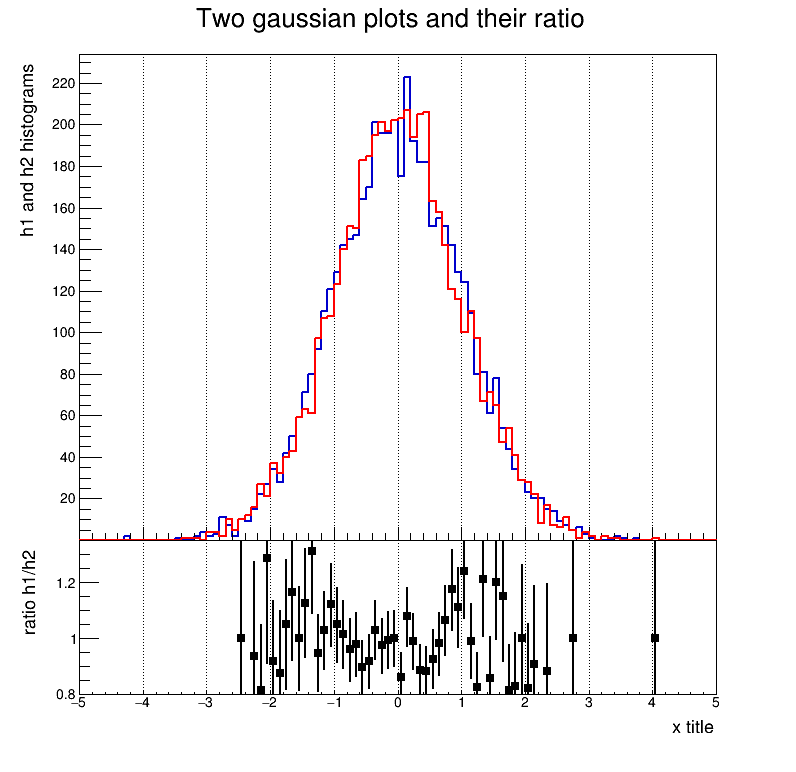

In [5]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()